In [1]:
import numpy as np
import matplotlib.pyplot as plt

Set up the inputs and targets.

In [42]:
Nclass = 500  # samples in each class

X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
print(Y.shape)

(1500,)


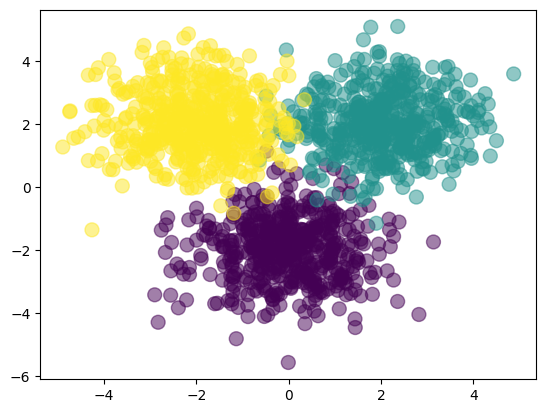

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, alpha=0.5)
plt.show()

In [44]:
D = 2  # dimensions of X
M = 3  # hidden units
K = 3  # classes

W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

In [45]:
def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    expA = np.exp(Z.dot(W2) + b2)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y

def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

def classification_rate_direct(Y, P):
    accuracy = np.sum(P == Y) / np.sum(Y)
    return accuracy

In [46]:
P_Y_given_X = forward(X, W1, b1, W2, b2)
P = np.argmax(P_Y_given_X, axis=1)

assert(len(P) == len(Y))

print(f"Classification rate for randomly chosen weights: {classification_rate(Y, P):.3f}")
print(f"Classification rate 2 for randomly chosen weights: {classification_rate_direct(Y, P):.3f}")

Classification rate for randomly chosen weights: 0.333
Classification rate 2 for randomly chosen weights: 0.333
